# **What is PyTorch?**

## **Tensor**

**Tensor（张量）类似于NumPy的ndarray，但还可以在GPU上使用来加速计算。**

In [1]:
import torch
import numpy as np

In [2]:
torch.empty(5, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [3]:
torch.rand(5, 3) #创建一个随机初始化矩阵

tensor([[0.3006, 0.1242, 0.1545],
        [0.5451, 0.0697, 0.9736],
        [0.7739, 0.6581, 0.2114],
        [0.5682, 0.0587, 0.7223],
        [0.2930, 0.3357, 0.2922]])

In [4]:
torch.zeros(5, 3, dtype=torch.long)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [5]:
x = torch.tensor([5.5, 3]) #直接从数据构造张量
x 

tensor([5.5000, 3.0000])

In [6]:
x = x.new_ones(5, 3, dtype=torch.double) #根据已有的tensor建立新的tensor。
                                         #除非用户提供新的值，否则这些方法将重用输入张量的属性，例如dtype等
print(x)
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.9420,  0.0035, -0.6216],
        [-1.2788, -0.5294,  0.8495],
        [ 1.6196, -0.5824, -0.2372],
        [ 1.8058,  1.8491,  0.2183],
        [ 0.3486,  0.1658,  1.7811]])


In [7]:
print(x.size()) #获取它的形状
                #torch.Size实际上是一个tuple

torch.Size([5, 3])


**运算**

In [8]:
y = torch.rand(5, 3) 
print(y)
print(x + y) #相同形状 逐个运算

tensor([[0.1594, 0.8395, 0.2657],
        [0.5238, 0.0794, 0.8617],
        [0.9091, 0.1758, 0.3135],
        [0.3704, 0.9744, 0.5074],
        [0.9853, 0.3415, 0.7607]])
tensor([[-0.7825,  0.8430, -0.3559],
        [-0.7550, -0.4501,  1.7112],
        [ 2.5287, -0.4066,  0.0762],
        [ 2.1761,  2.8235,  0.7256],
        [ 1.3339,  0.5073,  2.5418]])


In [9]:
print(torch.add(x, y)) #另一种形式

tensor([[-0.7825,  0.8430, -0.3559],
        [-0.7550, -0.4501,  1.7112],
        [ 2.5287, -0.4066,  0.0762],
        [ 2.1761,  2.8235,  0.7256],
        [ 1.3339,  0.5073,  2.5418]])


In [10]:
result = torch.empty(5, 3) #给定一个输出张量作为参数
torch.add(x, y, out=result) 
print(result) 

tensor([[-0.7825,  0.8430, -0.3559],
        [-0.7550, -0.4501,  1.7112],
        [ 2.5287, -0.4066,  0.0762],
        [ 2.1761,  2.8235,  0.7256],
        [ 1.3339,  0.5073,  2.5418]])


In [11]:
y.add_(x) #原位/原地操作（in-place）
print(y)

#任何一个in-place改变张量的操作后面都固定一个_。例如x.copy_(y)、x.t_()将更改x

tensor([[-0.7825,  0.8430, -0.3559],
        [-0.7550, -0.4501,  1.7112],
        [ 2.5287, -0.4066,  0.0762],
        [ 2.1761,  2.8235,  0.7256],
        [ 1.3339,  0.5073,  2.5418]])


In [12]:
print(x)
print(x[1, :]) #输出第二行
print(x[:, 1]) #输出第二列

tensor([[-0.9420,  0.0035, -0.6216],
        [-1.2788, -0.5294,  0.8495],
        [ 1.6196, -0.5824, -0.2372],
        [ 1.8058,  1.8491,  0.2183],
        [ 0.3486,  0.1658,  1.7811]])
tensor([-1.2788, -0.5294,  0.8495])
tensor([ 0.0035, -0.5294, -0.5824,  1.8491,  0.1658])


**如果想改变形状，可以使用torch.view**

In [13]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


**如果是仅包含一个元素的tensor，可以使用.item()来得到对应的python数值**

In [14]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.1431])
0.14310623705387115


**More:https://pytorch.org/docs/stable/torch.html**

## **NumPy Bridge**

**将一个Torch张量转换为一个NumPy数组是轻而易举的事情，反之亦然。Torch张量和NumPy数组将共享它们的底层内存位置，更改一个将更改另一个。**

**将torch的Tensor转化为NumPy数组**

In [15]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [16]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


**将NumPy数组转化为Torch张量**

In [17]:
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## **CUDA上的张量**

**张量可以使用.to方法移动到任何设备（device）上：**

In [18]:
# let us run this cell only if CUDA is available
# 我们将使用`torch.device`来将tensor移入和移出GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # 直接在GPU上创建tensor
    x = x.to(device)                       # 或者使用`.to("cuda")`方法
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # `.to`也能在移动时改变dtype

# **Autograd：自动求导**

**PyTorch中，所有神经网络的核心是autograd包，torch.Tensor是这个包的核心类。如果设置它的属性 .requires_grad为True，那么它将会追踪对于该张量的所有操作。当完成计算后可以通过调用.backward()，来自动计算所有的梯度。这个张量的所有梯度将会自动累加到.grad属性.**

**要阻止一个张量被跟踪历史，可以调用.detach()方法将其与计算历史分离，并阻止它未来的计算记录被跟踪。**

**为了防止跟踪历史记录（和使用内存），可以将代码块包装在with torch.no_grad():中。在评估模型时特别有用，因为模型可能具有requires_grad = True的可训练的参数，但是我们不需要在此过程中对他们进行梯度计算。**

**Tensor和Function互相连接生成了一个非循环图，它编码了完整的计算历史。每个张量都有一个.grad_fn属性，它引用了一个创建了这个Tensor的Function**

**如果需要计算导数，可以在Tensor上调用.backward()。如果Tensor是一个标量（即它包含一个元素的数据），则不需要为backward()指定任何参数，但是如果它有更多的元素，则需要指定一个gradient参数，它是形状匹配的张量。**

## **requires_grad以及grad_fn**

In [19]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [20]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [21]:
z = y * y *3
out = z.mean() #求平均值
print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


**mean() 求均值,另外的用法：torch.mean**

In [22]:
aa = torch.mean(z, 1)
print(aa)

tensor([27., 27.], grad_fn=<MeanBackward2>)


**.requires_grad_(...) 原地改变了现有张量的 requires_grad 标志。如果没有指定的话，默认输入的这个标志是False**

In [23]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.requires_grad, b.grad_fn)

False
True
True <SumBackward0 object at 0x00000238F4723208>


## **梯度**

**因为out是一个标量。所以让我们直接进行反向传播，out.backward()和out.backward(torch.tensor(1.))等价**

In [24]:
out.backward()

In [25]:
print(x.grad) #输出导数d(out)/dx

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [26]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
print(y)

tensor([-0.0106, -0.7078,  0.0667], requires_grad=True)
tensor([  -21.7552, -1449.5798,   136.4996], grad_fn=<MulBackward0>)


In [27]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


**torch.no_grad()**

In [28]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


# **神经网络**

**可以使用torch.nn包来构建神经网络.**

**nn包依赖于autograd包来定义模型并对它们求导。**

**一个nn.Module包含各个层和一个forward(input)方法，该方法返回output**

*神经网络训练过程*

**1.定义网络（传入参数或者权重）**

**2.遍历输入数据集**

**3.通过网络处理输入**

**4.计算损失函数**

**5.把梯度传回网络的参数**

**6.更新网络的权重,常用：weight = weight - learning_rate * gradient**

## **定义网络**

In [29]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 输入图像channel：1；输出channel：6；5x5卷积核
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 2x2 Max pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # 除去批大小维度的其余维度
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


**我们只需要定义 forward 函数，可以在 forward 函数中使用任何针对张量的操作和计算。**

**一个模型的可学习参数可以通过net.parameters()返回**

In [30]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [31]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0637, -0.0689, -0.2260,  0.0480,  0.0734, -0.0249, -0.0182, -0.1073,
         -0.0831,  0.0262]], grad_fn=<AddmmBackward>)


**清零所有参数的梯度缓存，然后进行随机梯度的反向传播：**

In [32]:
net.zero_grad()
out.backward(torch.randn(1, 10))

## **损失函数**

In [33]:
output = net(input)
target = torch.randn(10) 
target = target.view(1, -1) #变形 使其与output的形状一致
criterion = nn.MSELoss() #nn包中的一种，计算输出和目标的均方误差（mean-squared error）。

loss = criterion(output, target)
print(loss)
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

tensor(0.6872, grad_fn=<MseLossBackward>)


## **反向传播**

**调用loss.backward()来反向传播权重。我们需要清零现有的梯度，否则梯度将会与已有的梯度累加。**

In [34]:
net.zero_grad() #清零所有参数的梯度缓存

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0023, -0.0205, -0.0020, -0.0029,  0.0095, -0.0072])


## **更新权重**

**SGD是最简单的更新规则，但是我们使用torch.optim这个包来实现各种更新规则**

In [35]:
import torch.optim as optim

#创建优化器（optimizer）
optimizer = optim.SGD(net.parameters(), lr=0.01)

#在训练的迭代中：
optimizer.zero_grad() #清零梯度缓存
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() #更新参数

# **训练分类器**

**我们将按顺序做以下步骤：**

1.通过torchvision加载CIFAR10里面的训练和测试数据集，并对数据进行标准化

2.定义卷积神经网络

3.定义损失函数

4.利用训练数据训练网络

5.利用测试数据测试网络 

## **加载并标准化CIFAR10**

In [36]:
import torch
import torchvision
import torchvision.transforms as transforms

**torchvision数据集加载完后的输出是范围在[0, 1]之间的PILImage。我们将其标准化为范围在[-1, 1]之间的张量。**

In [37]:
transforms = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#Composes several transforms together.
#ToTensor：Convert a PIL Image or numpy.ndarray to tensor.
#Normalize(mean, std, inplace=False)  means标准差，std 方差

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

#参数解释
#数据加载程器。组合数据集和采样器，并在数据集上
#num_workers 提供单进程(取默认值0时)或多进程迭代器。
#shuffle 在每轮epoch打乱数据
#num_workers 多少子进程来加载数据，默认0(在主进程)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
           'frog', 'horse', 'ship', 'truck')

**展示一些训练数据的图片**

In [38]:
import matplotlib.pyplot as plt
import numpy as np

#输出图像的函数
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 随机得到一些训练图片
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 显示图片
imshow(torchvision.utils.make_grid(images))
# 打印图片标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

<Figure size 640x480 with 1 Axes>

plane   car horse   car


## **定义卷积神经网络**

In [39]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

## **定义损失函数和优化器**

In [40]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) #momentum 动量梯度下降法的参数

## **训练网络**

In [41]:
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #get the inputs
        inputs, labels = data 
        
        #zero the parameter gradients
        optimizer.zero_grad()
        
        #forward + backward +optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  #print every 2000 mini-batches
            print('[%d, %5d] loss：%.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss：2.175
[1,  4000] loss：1.889
[1,  6000] loss：1.695
[1,  8000] loss：1.594
[1, 10000] loss：1.547
[1, 12000] loss：1.466
[2,  2000] loss：1.405
[2,  4000] loss：1.383
[2,  6000] loss：1.348
[2,  8000] loss：1.332
[2, 10000] loss：1.299
[2, 12000] loss：1.278
Finished Training


## **使用测试数据测试网络**

**显示测试集中的图像**

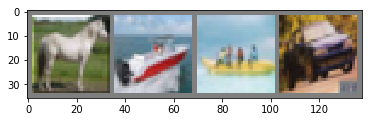

GroundTruth:  horse***** ship***** ship*****  car


In [42]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 输出图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', '*****'.join('%5s' % classes[labels[j]] for j in range(4)))

**输出是10个类别的量值。一个类的值越高，网络就越认为这个图像属于这个特定的类**

In [43]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)
print('Predicted：', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted： horse  ship  ship   car


**在整个数据集上的表现**

In [44]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data 
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images：%d %%' % 
      (100 * correct / total))

Accuracy of the network on the 10000 test images：53 %


**哪些是表现好的类呢？哪些是表现的差的类**

In [45]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data 
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1 
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 58 %
Accuracy of   car : 79 %
Accuracy of  bird : 37 %
Accuracy of   cat : 29 %
Accuracy of  deer : 50 %
Accuracy of   dog : 46 %
Accuracy of  frog : 65 %
Accuracy of horse : 56 %
Accuracy of  ship : 77 %
Accuracy of truck : 29 %


# **在GPU上训练&数据并行处理(略)**